In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('nyctaxi/green_tripdata_2019-09.csv')
pd.set_option('display.max_columns', 50)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,2019-09-01 00:10:53,2019-09-01 00:23:46,N,1.0,65,189,5.0,2.00,10.50,0.50,0.5,2.36,0.00,NaN,0.3,14.16,1.0,1.0,0.0
1,2.0,2019-09-01 00:31:22,2019-09-01 00:44:37,N,1.0,97,225,5.0,3.20,12.00,0.50,0.5,0.00,0.00,NaN,0.3,13.30,2.0,1.0,0.0
2,2.0,2019-09-01 00:50:24,2019-09-01 01:03:20,N,1.0,37,61,5.0,2.99,12.00,0.50,0.5,0.00,0.00,NaN,0.3,13.30,2.0,1.0,0.0
3,2.0,2019-09-01 00:27:06,2019-09-01 00:33:22,N,1.0,145,112,1.0,1.73,7.50,0.50,0.5,1.50,0.00,NaN,0.3,10.30,1.0,1.0,0.0
4,2.0,2019-09-01 00:43:23,2019-09-01 00:59:54,N,1.0,112,198,1.0,3.42,14.00,0.50,0.5,3.06,0.00,NaN,0.3,18.36,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449058,NaN,2019-09-30 23:13:00,2019-09-30 23:41:00,NaN,NaN,66,71,NaN,7.84,43.25,2.75,0.5,0.00,0.00,NaN,0.0,46.50,NaN,NaN,NaN
449059,NaN,2019-09-30 23:26:00,2019-09-30 23:46:00,NaN,NaN,55,26,NaN,3.56,25.75,2.75,0.5,0.00,0.00,NaN,0.0,29.00,NaN,NaN,NaN
449060,NaN,2019-09-30 23:15:00,2019-09-30 23:43:00,NaN,NaN,139,78,NaN,18.47,50.47,2.75,0.5,0.00,6.12,NaN,0.0,59.84,NaN,NaN,NaN
449061,NaN,2019-09-30 23:19:00,2019-10-01 00:06:00,NaN,NaN,242,188,NaN,20.10,58.22,2.75,0.5,0.00,6.12,NaN,0.0,67.59,NaN,NaN,NaN


In [4]:
df.isna().sum()

VendorID                  59143
lpep_pickup_datetime          0
lpep_dropoff_datetime         0
store_and_fwd_flag        59143
RatecodeID                59143
PULocationID                  0
DOLocationID                  0
passenger_count           59143
trip_distance                 0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
ehail_fee                449063
improvement_surcharge         0
total_amount                  0
payment_type              59143
trip_type                 59143
congestion_surcharge      59143
dtype: int64

In [5]:
df.apply(pd.Series.nunique)

VendorID                      2
lpep_pickup_datetime     375970
lpep_dropoff_datetime    375250
store_and_fwd_flag            2
RatecodeID                    7
PULocationID                257
DOLocationID                260
passenger_count              10
trip_distance              3142
fare_amount                4179
extra                        18
mta_tax                      16
tip_amount                 1683
tolls_amount                104
ehail_fee                     0
improvement_surcharge         3
total_amount               6175
payment_type                  5
trip_type                     2
congestion_surcharge          5
dtype: int64

In [6]:
df.trip_type.unique()

array([ 1.,  2., nan])

In [7]:
df.drop('ehail_fee', axis=1, inplace=True)

In [8]:
dropna_df = df.dropna(axis=0).copy()

In [9]:
dropna_df.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

In [10]:
dropna_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389920 entries, 0 to 389919
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               389920 non-null  float64
 1   lpep_pickup_datetime   389920 non-null  object 
 2   lpep_dropoff_datetime  389920 non-null  object 
 3   store_and_fwd_flag     389920 non-null  object 
 4   RatecodeID             389920 non-null  float64
 5   PULocationID           389920 non-null  int64  
 6   DOLocationID           389920 non-null  int64  
 7   passenger_count        389920 non-null  float64
 8   trip_distance          389920 non-null  float64
 9   fare_amount            389920 non-null  float64
 10  extra                  389920 non-null  float64
 11  mta_tax                389920 non-null  float64
 12  tip_amount             389920 non-null  float64
 13  tolls_amount           389920 non-null  float64
 14  improvement_surcharge  389920 non-nu

In [11]:
dropna_df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
dropna_df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

In [12]:
dropna_df['lpep_pickup_date'] = dropna_df['lpep_pickup_datetime'].dt.date
dropna_df['lpep_pickup_time'] = dropna_df['lpep_pickup_datetime'].dt.hour
dropna_df['lpep_dropoff_date'] = dropna_df['lpep_dropoff_datetime'].dt.date
dropna_df['lpep_dropoff_time'] = dropna_df['lpep_dropoff_datetime'].dt.hour

# dropna_df['lpep_pickup_day'] = dropna_df['lpep_pickup_datetime'].dt.weekday_name



In [13]:
dropna_df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,lpep_pickup_date,lpep_pickup_time,lpep_dropoff_date,lpep_dropoff_time
0,2.0,2019-09-01 00:10:53,2019-09-01 00:23:46,N,1.0,65,189,5.0,2.00,10.5,0.5,0.5,2.36,0.0,0.3,14.16,1.0,1.0,0.0,2019-09-01,0,2019-09-01,0
1,2.0,2019-09-01 00:31:22,2019-09-01 00:44:37,N,1.0,97,225,5.0,3.20,12.0,0.5,0.5,0.00,0.0,0.3,13.30,2.0,1.0,0.0,2019-09-01,0,2019-09-01,0
2,2.0,2019-09-01 00:50:24,2019-09-01 01:03:20,N,1.0,37,61,5.0,2.99,12.0,0.5,0.5,0.00,0.0,0.3,13.30,2.0,1.0,0.0,2019-09-01,0,2019-09-01,1
3,2.0,2019-09-01 00:27:06,2019-09-01 00:33:22,N,1.0,145,112,1.0,1.73,7.5,0.5,0.5,1.50,0.0,0.3,10.30,1.0,1.0,0.0,2019-09-01,0,2019-09-01,0
4,2.0,2019-09-01 00:43:23,2019-09-01 00:59:54,N,1.0,112,198,1.0,3.42,14.0,0.5,0.5,3.06,0.0,0.3,18.36,1.0,1.0,0.0,2019-09-01,0,2019-09-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389915,2.0,2019-09-30 23:42:22,2019-09-30 23:52:33,N,1.0,42,151,1.0,2.31,9.5,0.5,0.5,0.00,0.0,0.3,10.80,2.0,1.0,0.0,2019-09-30,23,2019-09-30,23
389916,1.0,2019-09-30 23:10:50,2019-09-30 23:20:31,N,1.0,129,83,3.0,1.30,8.0,0.5,0.5,0.00,0.0,0.3,9.30,2.0,1.0,0.0,2019-09-30,23,2019-09-30,23
389917,1.0,2019-09-30 23:34:03,2019-09-30 23:41:06,N,1.0,129,129,3.0,1.00,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2.0,1.0,0.0,2019-09-30,23,2019-09-30,23
389918,2.0,2019-09-30 23:06:54,2019-09-30 23:32:58,N,1.0,37,89,1.0,5.87,21.5,0.5,0.5,6.84,0.0,0.3,29.64,1.0,1.0,0.0,2019-09-30,23,2019-09-30,23


In [14]:
dropna_df['trip_duration'] = (dropna_df['lpep_dropoff_datetime'] - dropna_df['lpep_pickup_datetime']).dt.total_seconds()/60



In [15]:
dropna_df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'lpep_pickup_date',
       'lpep_pickup_time', 'lpep_dropoff_date', 'lpep_dropoff_time',
       'trip_duration'],
      dtype='object')

In [16]:
smaller_df = dropna_df.loc[:,['passenger_count','trip_distance','PULocationID', 'DOLocationID', 'extra', 
                      'mta_tax', 'tip_amount', 'tolls_amount', 
                      'improvement_surcharge', 'total_amount', 'congestion_surcharge','fare_amount','trip_duration']]

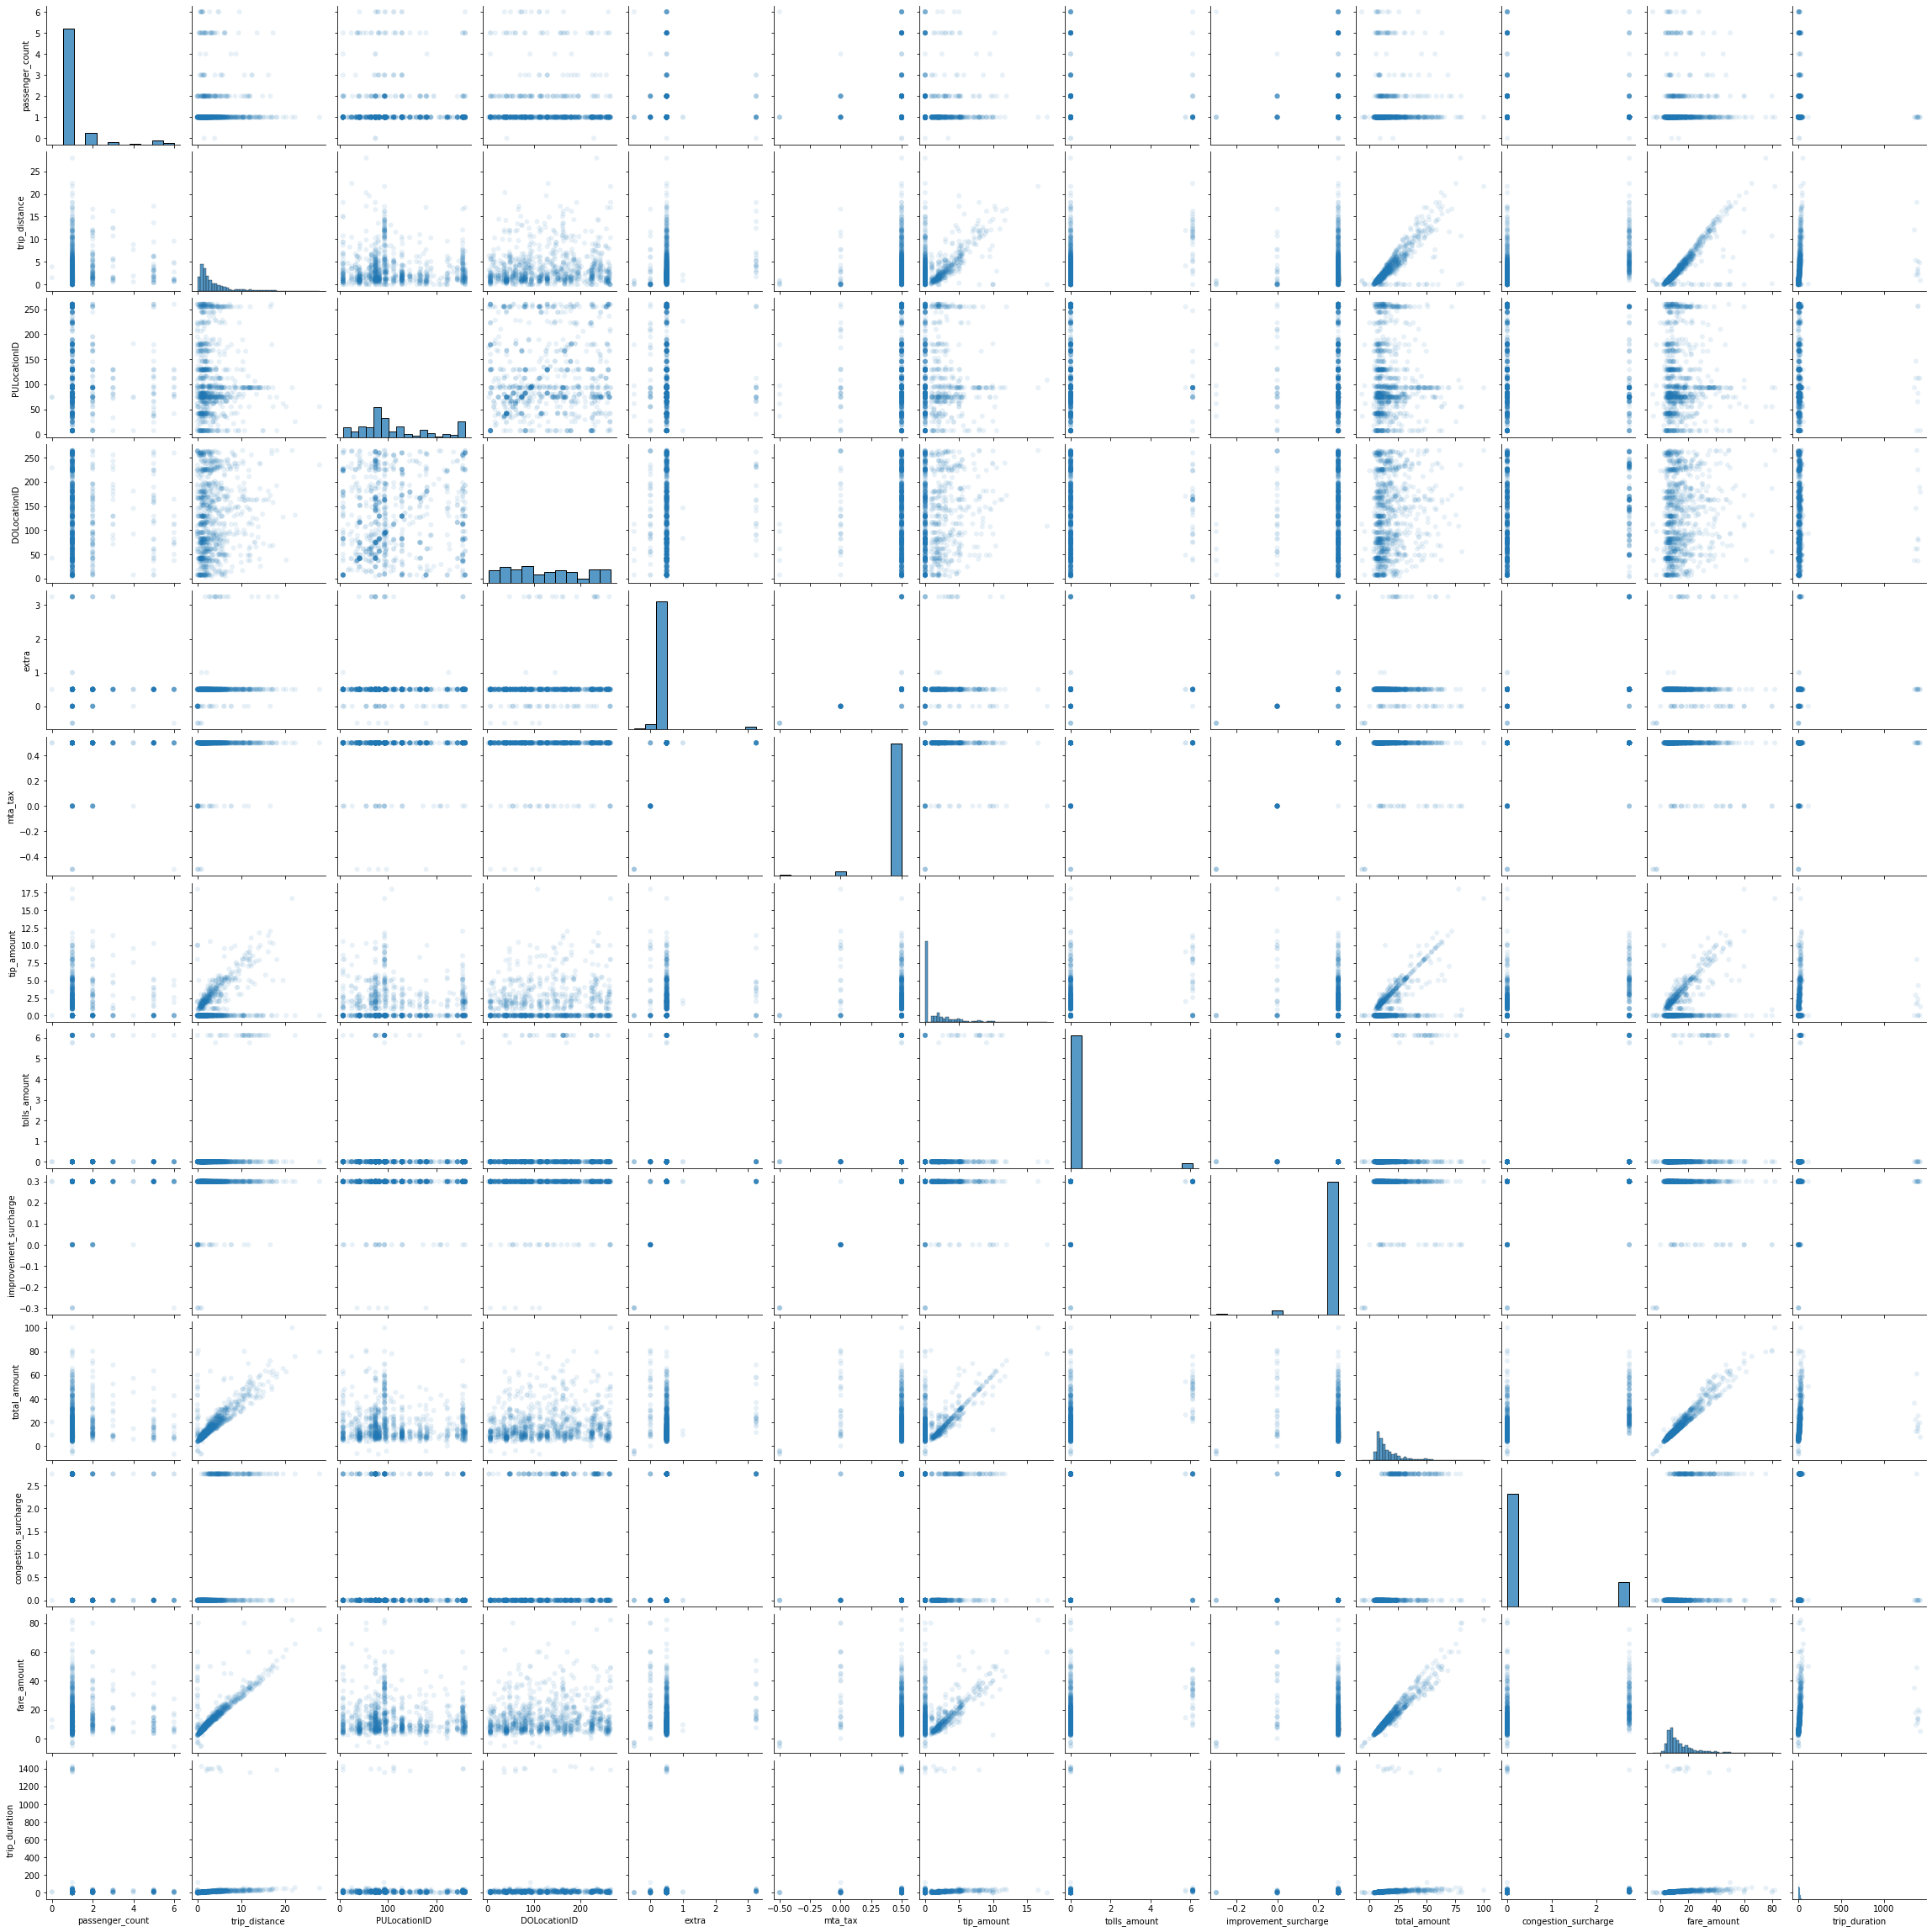

In [17]:
sns.pairplot(smaller_df[:1000], plot_kws=dict(alpha=.1, edgecolor='none'))

In [18]:
dropna_df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,lpep_pickup_date,lpep_pickup_time,lpep_dropoff_date,lpep_dropoff_time,trip_duration
0,2.0,2019-09-01 00:10:53,2019-09-01 00:23:46,N,1.0,65,189,5.0,2.00,10.5,0.5,0.5,2.36,0.0,0.3,14.16,1.0,1.0,0.0,2019-09-01,0,2019-09-01,0,12.883333
1,2.0,2019-09-01 00:31:22,2019-09-01 00:44:37,N,1.0,97,225,5.0,3.20,12.0,0.5,0.5,0.00,0.0,0.3,13.30,2.0,1.0,0.0,2019-09-01,0,2019-09-01,0,13.250000
2,2.0,2019-09-01 00:50:24,2019-09-01 01:03:20,N,1.0,37,61,5.0,2.99,12.0,0.5,0.5,0.00,0.0,0.3,13.30,2.0,1.0,0.0,2019-09-01,0,2019-09-01,1,12.933333
3,2.0,2019-09-01 00:27:06,2019-09-01 00:33:22,N,1.0,145,112,1.0,1.73,7.5,0.5,0.5,1.50,0.0,0.3,10.30,1.0,1.0,0.0,2019-09-01,0,2019-09-01,0,6.266667
4,2.0,2019-09-01 00:43:23,2019-09-01 00:59:54,N,1.0,112,198,1.0,3.42,14.0,0.5,0.5,3.06,0.0,0.3,18.36,1.0,1.0,0.0,2019-09-01,0,2019-09-01,0,16.516667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389915,2.0,2019-09-30 23:42:22,2019-09-30 23:52:33,N,1.0,42,151,1.0,2.31,9.5,0.5,0.5,0.00,0.0,0.3,10.80,2.0,1.0,0.0,2019-09-30,23,2019-09-30,23,10.183333
389916,1.0,2019-09-30 23:10:50,2019-09-30 23:20:31,N,1.0,129,83,3.0,1.30,8.0,0.5,0.5,0.00,0.0,0.3,9.30,2.0,1.0,0.0,2019-09-30,23,2019-09-30,23,9.683333
389917,1.0,2019-09-30 23:34:03,2019-09-30 23:41:06,N,1.0,129,129,3.0,1.00,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2.0,1.0,0.0,2019-09-30,23,2019-09-30,23,7.050000
389918,2.0,2019-09-30 23:06:54,2019-09-30 23:32:58,N,1.0,37,89,1.0,5.87,21.5,0.5,0.5,6.84,0.0,0.3,29.64,1.0,1.0,0.0,2019-09-30,23,2019-09-30,23,26.066667


In [19]:
# lpep_dropoff_time
# dropna_df.lpep_dropoff_time.sort_values()

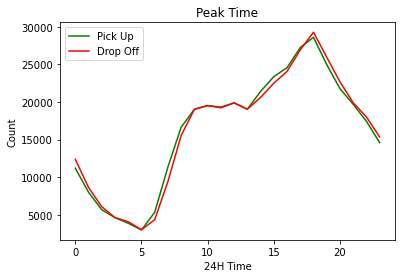

In [20]:
pu = dropna_df.lpep_pickup_time.value_counts()
do = dropna_df.lpep_dropoff_time.value_counts()

time = pu.index.sort_values()

fig, ax = plt.subplots()

ax.plot(pu.sort_index().index, pu.sort_index().values, label="Pick Up", color='g')
ax.plot(do.sort_index().index, do.sort_index().values, label="Drop Off", color='r');

plt.title("Peak Time")
plt.xlabel("24H Time")
plt.ylabel("Count")
ax.legend();


In [21]:
# taxi_zones = pd.read_csv('taxi_zones.csv')

In [22]:
# dropna_df
dropna_df.VendorID.value_counts()

2.0    326666
1.0     63254
Name: VendorID, dtype: int64

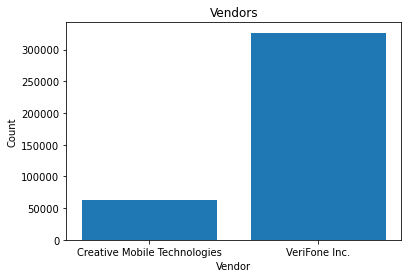

In [23]:
vendorId = dropna_df.VendorID.value_counts()
dropna_df.VendorID = dropna_df.VendorID.astype('int')
plt.bar(['Creative Mobile Technologies','VeriFone Inc.'], vendorId.sort_index().values)
plt.title('Vendors')
plt.xlabel('Vendor')
plt.ylabel('Count');


In [24]:
dropna_df.passenger_count = dropna_df.passenger_count.astype('int')
dropna_df = dropna_df.loc[dropna_df.passenger_count!=0]
dropna_df = dropna_df.loc[dropna_df.passenger_count<7]

In [25]:
passenger_count = dropna_df.passenger_count.value_counts()
passenger_count

1    334635
2     29225
5     11765
6      5817
3      5566
4      1976
Name: passenger_count, dtype: int64

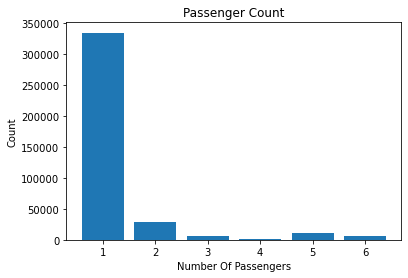

In [26]:
plt.bar(passenger_count.sort_index().index, passenger_count.sort_index().values)
plt.title('Passenger Count')
plt.xlabel('Number Of Passengers')
plt.ylabel('Count');



In [27]:
# dropna_df = dropna_df.loc[dropna_df.fare_amount<=300]
# dropna_df = dropna_df.loc[dropna_df.trip_distance<=100]
# dropna_df = dropna_df.loc[dropna_df.trip_distance>0]
# dropna_df = dropna_df.loc[dropna_df.fare_amount>0]
# sns.scatterplot(data=dropna_df, x="trip_distance", y="fare_amount")